In [27]:
import pandas as pd 
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

In [8]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [9]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Агрегируйте число поездок по дням и визуализируйте результат. 

In [10]:
df.index = df.timestamp

In [11]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


<AxesSubplot:xlabel='timestamp'>

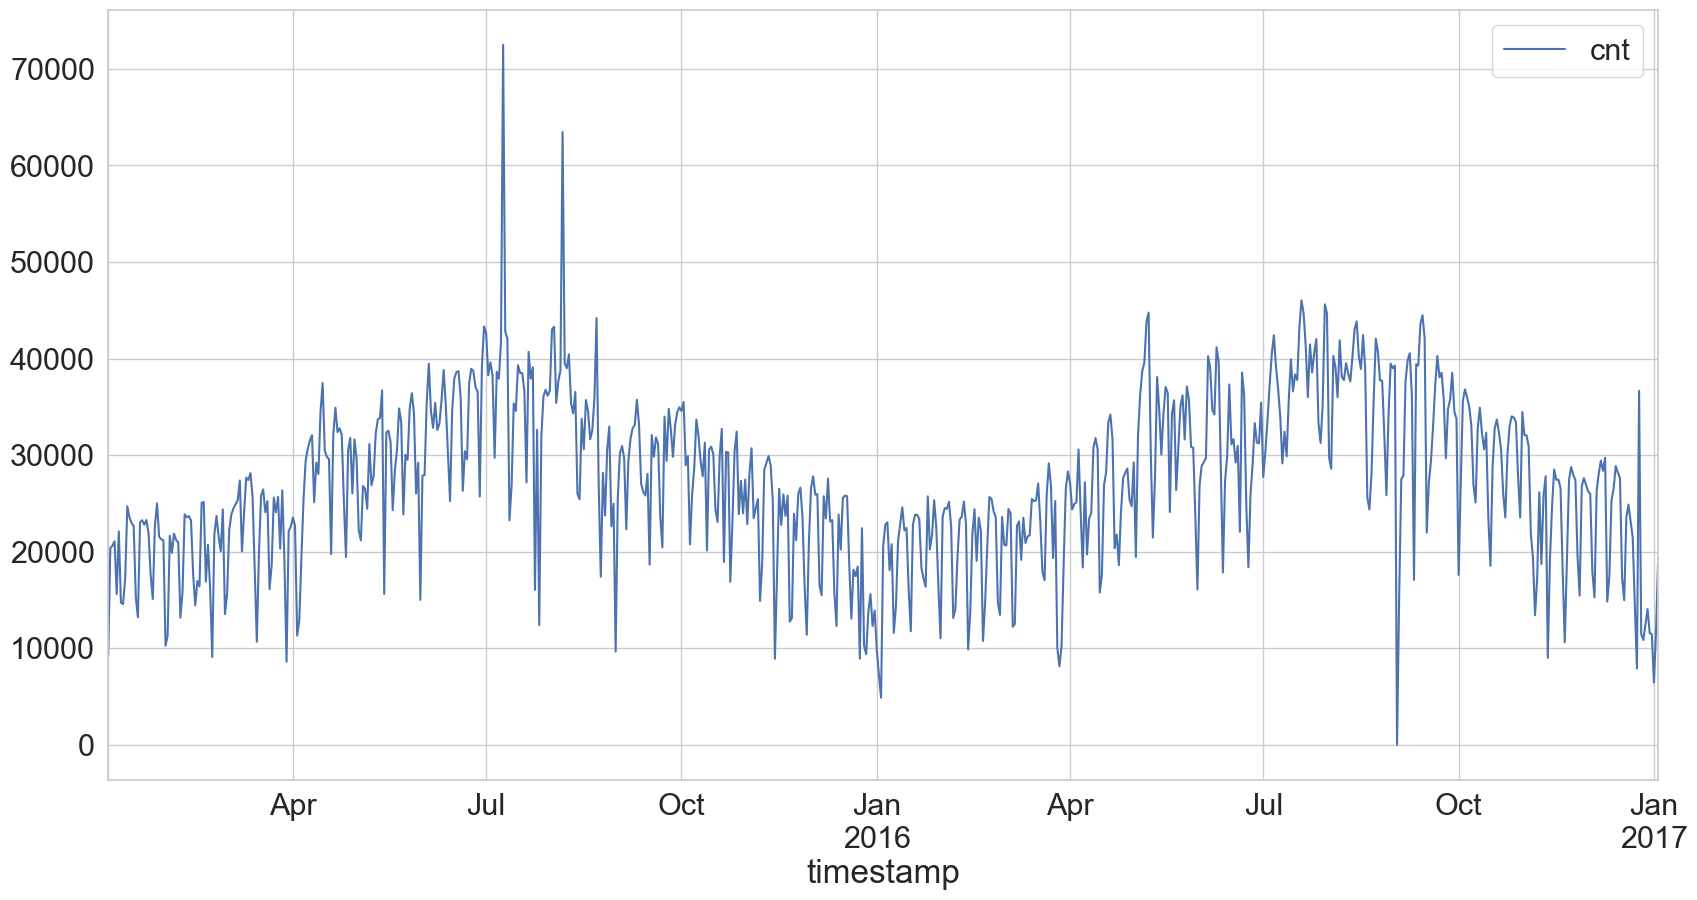

In [19]:
sns.set(
font_scale = 2 ,
style = 'whitegrid' ,
rc = {'figure.figsize' : (20,10)})
df.resample(rule='D').agg({'cnt':'sum'}).plot() 

In [21]:
tc = df.resample(rule='D').agg({'cnt':'sum'}).reset_index()

In [22]:
tc['cnt_roll'] = tc.cnt.rolling(window=3).mean()

In [23]:
tc

,timestamp,cnt,cnt_roll
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


<AxesSubplot:>

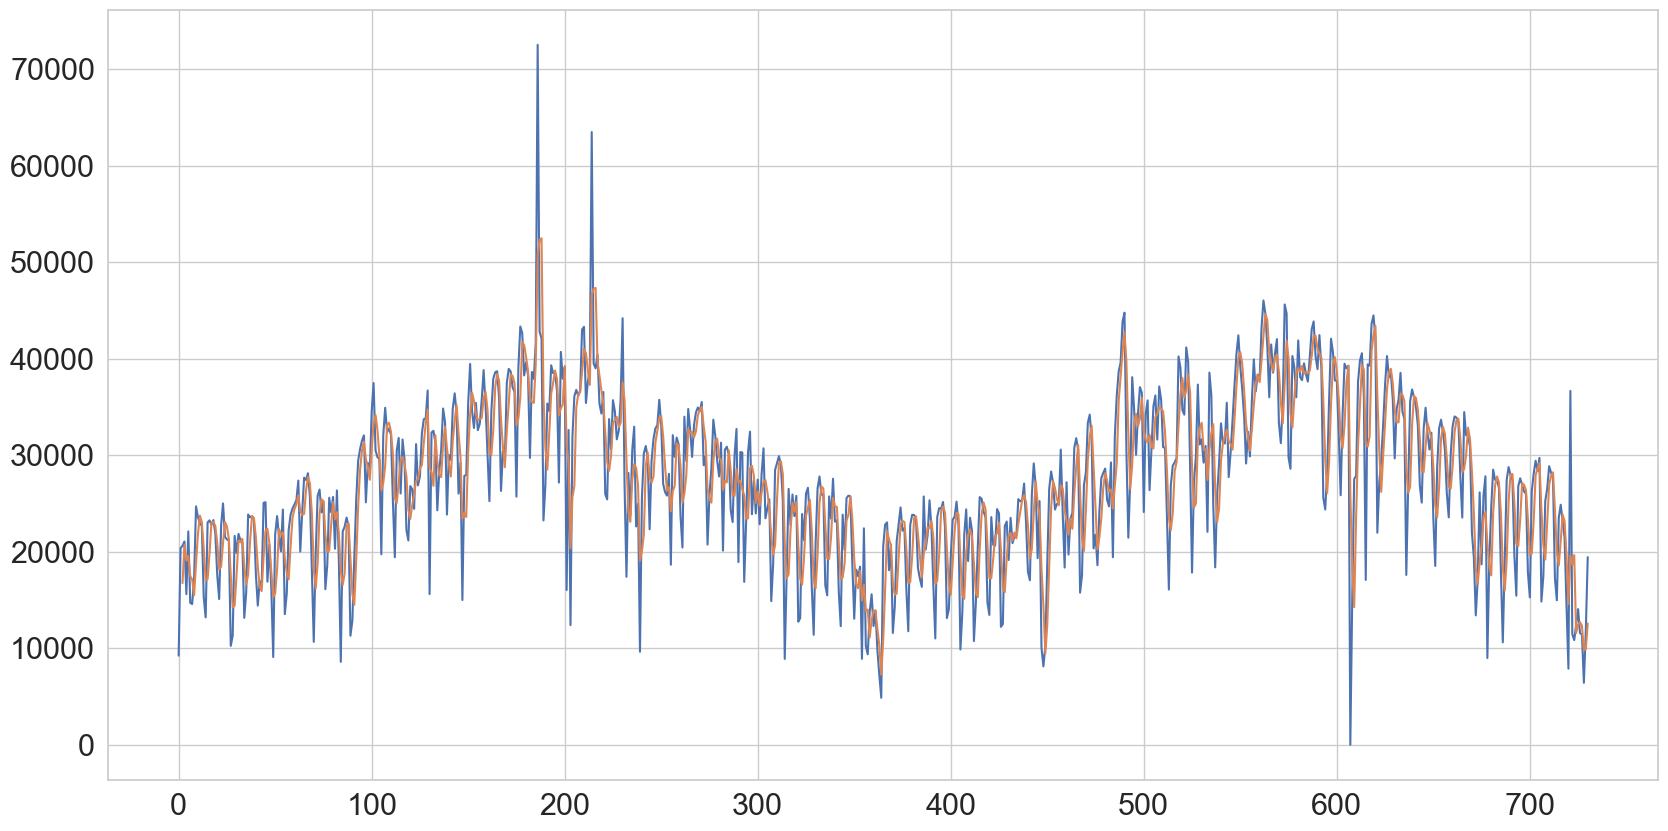

In [26]:
tc.cnt.plot()
tc.cnt_roll.plot()

Теперь посчитайте разницу между наблюдаемыми и подсчитанными значениями. Далее – примените функцию для подсчета стандартного отклонения.

In [30]:
tc['diff'] = tc.cnt - tc.cnt_roll

In [31]:
tc.head()

,timestamp,cnt,cnt_roll,diff
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667


In [37]:
std = round(np.std(tc['diff']),2)

In [38]:
std

4558.59

Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

upper_bound – верхняя граница; к скользящим средним прибавляем 2.576∗std
lower_bound – нижняя граница; вычитаем 2.576∗std

In [43]:
tc['up'] = std * 2.576 + tc.cnt_roll
tc['low'] = tc.cnt_roll- std * 2.576 

In [45]:
tc[tc.cnt>tc.up]

,timestamp,cnt,cnt_roll,diff,up,low
186,2015-07-09,72504,50705.000000,21799.000000,62447.927840,38962.072160
214,2015-08-06,63468,46627.333333,16840.666667,58370.261173,34884.405493
609,2016-09-04,27512,14259.000000,13253.000000,26001.927840,2516.072160
721,2016-12-25,36653,19650.666667,17002.333333,31393.594507,7907.738827
